In [30]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error 



In [31]:
def total_score(y_test, pred = None, pred_proba= None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:,4f}, AUC:{4:.4f}'.format(accuracy,precision, recall, f1 , roc_auc))

In [32]:
path = './data/data_for_model.csv' #./:작업하고 있는 파일을 나타내는 위치

data = pd.read_csv(path)
df=data
del df["wind_speed"]

In [33]:
X = df.iloc[:,2:13]
y = df.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
model = xgb.XGBRegressor()

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [36]:
predictions = model.predict(X_test)

In [37]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(mae)
print(mse)

0.5778713199856953
0.7418284352903624


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

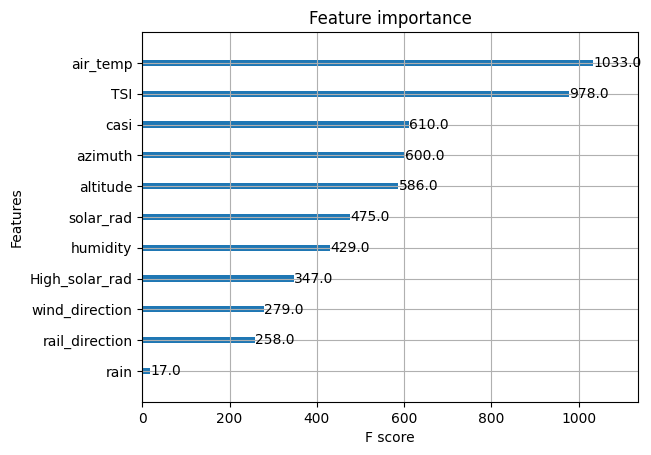

In [38]:
xgb.plot_importance(model)

In [39]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9975512275083803
0.9964379953800687


Gamma에 따른 튜닝

In [40]:
model1 = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)

In [41]:
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))
print(mae)
print(mse)

0.9951735333370135
0.9940302539507583
0.7898843082261481
1.2432682838225206


In [42]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 20, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9949665970883295
0.9938671157120267
0.8079712102739365
1.2772436985923719


In [43]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 100, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9933856233914483
0.9923066967485363
0.9017873715714786
1.6022188969978646


n_estimator에 따른 튜닝

In [44]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 1000, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9973770089048657
0.9961867760509012
0.6294749949416738
0.7941477503266916


In [45]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 10000, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9973770089232658
0.9961867760501492
0.6294749947934313
0.7941477504833196


max_depth에 따른 튜닝

In [46]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 20, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9973494607038506
0.9949787251087613
0.7560227415428401
1.0457382550509586


In [47]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 1, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9700044629496475
0.9696871392774413
1.8553745131823454
6.313001929633738


In [48]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 3, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9899777926404146
0.9893696031664645
1.0301318817127214
2.213902420398729


min_child_weight에 따른 튜닝

In [49]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 10,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9958243651043416
0.9944828517479151
0.765404935464321
1.1490095864019587


In [50]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 1000,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9919390801836206
0.9912454285491179
0.9495098514972758
1.8232402071311347


In [51]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 500,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9935733989514763
0.9926892813805077
0.867764225994578
1.52254124657781


colsample_bytree에 따른 튜닝

In [52]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 1)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9965926313214072
0.9956406431401006
0.6328529135281337
0.9078862110835426


In [53]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.25)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9926452204448667
0.9913767910773326
0.9502447025341952
1.795882449587536


In [54]:
model = xgb.XGBRegressor(learning_rate = 0.3, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9951735333370135
0.9940302539507583
0.7898843082261481
1.2432682838225206


learning_rate에 따른 튜닝

In [55]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9944050395879094
0.992663350574736
0.8751683229380235
1.5279416351578445


In [56]:
model = xgb.XGBRegressor(learning_rate = 0.75, n_estimators = 100, min_child_weight = 100,
                          gamma = 10, max_depth = 6, colsample_bytree = 0.5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mae)
print(mse)

0.9919138710418047
0.9886698114881267
1.091815773590372
2.3596420870082846


In [57]:
#eta: learning_rate >> 0~1의 범위, 클수록 과적합
#num_boost_aroung(n_estimators): 학습에 사용뢰 weak learner의 수
#min_child_weight: leaf node에 포함될 최고 관측치의 수 >> 0~무한대, 작을수록 과적합
#gamma: leaf node의 추가분할을 결정할 최소손실 감소값 >> 0~무한대, 클수록 과적합
#max_depth: 트리의 최대 깊이 설정 >> 0~무한대, 과적합에 가장 민감하게 작용함
#sub_sample: 학습 시 데이터 샘플링 비율을 지정 >> 0~1이지만 보통 0.5~1 사용, 미리 split을 해놓으면 의미는 없는듯?
#colsample_bytree: 트리 생성에 필요한 feature의 샘플링에 사용 >> 0~1, feature가 많은 때 과적합 조절에 이용